<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Graded_Assignment_1/Graded_Assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classifier

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning/'


Mounted at /content/gdrive


In [0]:
# try:
#   # %tensorflow_version only exists in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass

#Importing all the required libraries

In [0]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import pickle

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

#Downloading the dataset

In [0]:
Digit_recognizer_mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = Digit_recognizer_mnist.load_data()


In [0]:
class_names =['0','1','2','3','4','5','6','7','8','9']

#Exploring the data

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
len(x_test)

10000

In [55]:
x_test[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [56]:
x_test.shape

(10000, 28, 28)

In [57]:
len(y_test)

10000

In [0]:
# x_test[x_test==255]
# x_test.shape

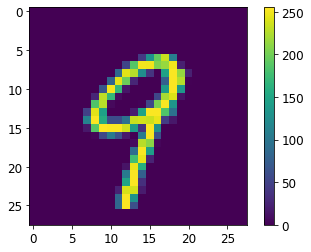

In [58]:
plt.figure()
plt.imshow(x_train[6779])
plt.colorbar()
plt.grid(False)
plt.show()

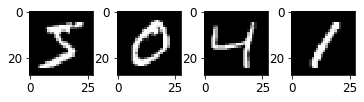

In [59]:
plt.subplot(341)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(342)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(343)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(344)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

##To apply simple neural network using multi layer perceptron, we need to reduce the images from 3-D to vector of pixels using the reshape() function...

###Converting 28 * 28 images to 784 vectors for each image

In [0]:
pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0],pixels)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],pixels)).astype("float32")


##Normalizing the input values

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [62]:
x_test.shape

(10000, 784)

In [63]:
x_train.shape

(60000, 784)

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [69]:
y_train.shape

(60000, 10)

In [70]:
y_test.shape

(10000, 10)

In [0]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_test.shape[1]

##Pixels range between 0 and 255, we will need to map those values from 0.01 and 1 by multiplying ht epixels and adding 0.01 to every results.

In [0]:
# f = 0.99/255
# train_x = np.asfarray(x_train[:, 0:]) * f +0.01
# test_x = np.asfarray(x_test[:, 1:]) * f + 0.01
# train_y = np.asfarray(y_train[:, :1])
# test_y = np.asfarray(y_test[:, :1])

Label to one hot encoding

In [0]:
# l = np.arange(10)
# for lb in range(10):
#   cat = (l==lb).astype(np.int)
#   print('One-hot-encoding', cat)

##Instead of using 0's and 1's, we will assign 0.01 and 0.99 for better calculations


In [0]:
img_size = 28
dif_lbs = 10
img_pixel = img_size * img_size

In [0]:
# l = np.arange(dif_lbs)
# train_lbl = (l==train_y).astype(np.float)
# test_lbl = (l==test_y).astype(np.float)

# train_lbl[train_lbl==0] = 0.01
# train_lbl[train_lbl==1] = 0.99
# test_lbl[test_lbl==0] = 0.01
# test_lbl[test_lbl==1] = 0.99

In [0]:
# train_lbl.shape

In [0]:
# test_lbl.shape

In [0]:
# train_y.shape

In [0]:
# train_x.shape

##Classifying the data..

In [0]:
@np.vectorize
def sigmoid(x):
  return 1/(1+np.e ** -x)
active_func = sigmoid

In [0]:
from scipy.stats import truncnorm

def trunc_norm(mean=0, std=1, lo=0, up=10):
  return truncnorm((lo-mean) / std, (up-mean) / std, loc=mean, scale=std)

In [0]:
class NN:
  def __init__(self, numof_input_nodes, numof_output_nodes, numof_hidden_nodes, learn_rate):
    self.numof_input_nodes = numof_input_nodes
    self.numof_output_nodes = numof_output_nodes
    self.numof_hidden_nodes = numof_hidden_nodes
    self.learn_rate = learn_rate
    self.create_wt_matrices()

  def create_wt_matrices(self):
    r = 1 / np.sqrt(self.numof_input_nodes)
    x = trunc_norm(mean=0, std=1,lo=-r, up=r)
    self.w = x.rvs((self.numof_hidden_nodes, self.numof_input_nodes))
    r= 1 / np.sqrt(self.numof_hidden_nodes)
    x = trunc_norm(mean =0, std=1,lo=-r, up=r)
    self.ho = x.rvs(self.numof_output_nodes, self.numof_hidden_nodes)

  def dropout_wt_matrices(self,in_percent=0.70,hid_percent=0.70):
        # restore wih array, if it had been used for dropout
        self.w_origin = self.w.copy()
        self.nodes_origin = self.numof_input_nodes
        self.hid_node_origin = self.numof_hidden_nodes
        self.ho_origin = self.ho.copy()
        

        in_node = int(self.numof_input_nodes * in_percent)
        in_indices = sorted(random.sample(range(0, self.numof_input_nodes), 
                                      in_node))
        hid_nodes = int(self.numof_hidden_nodes * hid_percent)
        hid_indices = sorted(random.sample(range(0, self.numof_hidden_nodes), 
                                       hid_nodes))
        
        self.w = self.w[:, in_indices][hid_indices]       
        self.ho = self.ho[:, hid_indices]
        
        self.numof_hidden_nodes = hid_nodes
        self.numof_input_nodes = in_node
        return in_indices, hid_indices

  def train(self, in_vec, tar_vec):
    in_vec = np.array(in_vec, ndmin=2).T 
    tar_vec = np.array(tar_vec, ndmin=2).T 
    out_vec1 = np.dot(self.w, in_vec)
    out_hid = active_func(out_vec1)
    out_vec2 = np.dot(self.ho, out_hid)
    out_net = active_func(out_vec2)
    out_error = tar_vec - out_net
    #updating the weights
    temp = out_error * out_net * (1.0 - out_net)
    temp = self.learn_rate * np.dot(temp, out_hid.T)
    self.ho += temp 

  #Calculating the hidden errors:

    hid_err = np.dot(self.ho.T, out_error)

    #updating the weight
    temp = hid_err * out_hid * (1.0 - out_hid)
    self.w += self.learn_rate * np.dot(temp, in_vec.T)

  def run(self, in_vec):
    in_vec = np.array(in_vec, ndmin=2).T 
    out_vec = np.dot(self.w,in_vec)
    out_vec = active_func(out_vec)
    out_vec = np.dot(self.ho, out_vec)
    out_vec = active_func(out_vec)
    return out_vec

  def conf_mat(self, data_arr, lbs):
    s = np.zeros((10,10), int)
    for i in range(len(data_arr)):
      r = self.run(data_arr[i])
      r_mx =r.argmax()
      tar = lbs[i][0]
      s[r_mx, int(tar)] +=1
    return s

  def precision_func(self, lb, conf_mat):
    c = conf_mat[:, lb]
    return conf_mat[lb,lb] / c.sum()

  def recall_func(self, lb, conf_mat):
    r = conf_mat[lb, :]
    return conf_mat[lb, lb] / r.sum()

  def eval(self, dt, lbs):
    right, wrong = 0, 0
    for i in range(len(dt)):
      r = self.run(dt[i])
      r_mx = r.argmax()
      if r_mx == lbs[i]:
        right += 1
      else:
        wrong +=1
    return right, wrong

# NeuralNet = NN(numof_input_nodes=img_pixel, numof_output_nodes=10, numof_hidden_nodes=100, learn_rate=0.1)
# for i in range(len(train_x)):
#   NeuralNet.train(train_x[i], train_lbl[i])
# for i in range(20):
#   r = NeuralNet.run(test_x[i])
#   print(test_y[i], np.argmax(r), np.max(r))

In [74]:
epochs = 3

NeuralNet = NN(numof_input_nodes=img_pixel, numof_output_nodes=10, numof_hidden_nodes=100, learn_rate=0.1)


for epoch in range(epochs):  
    print("epoch: ", epoch)
    for i in range(len(x_train)):
        NeuralNet.train(x_train[i], x_test[i])
  
    right, wrong = NN.eval(x_train, x_test)
    print("accuracy train: ", right / ( right + wrong))
    right, wrong = NN.eval(y_train, y_test)
    print("accuracy: test", right / ( right + wrong))

epoch:  0


ValueError: ignored